In [1]:
!pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27090 sha256=aacf00999d15c49f7d58b8e95ccde3b923973453241106399bd2727b18d74021
  Stored in directory: C:\Users\DELL\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291997 sha256=5607162438dd4402a228e2fb5a9a63033c40445e22c6e1f4e8dfc88a43ca0bf9
  Stored in directory: C:\Users\DELL\AppData\Local\pip\Cache\wheels\07\1c\dc\6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: networkx 2.3
    Uninstalling networkx-2.3:
      Successfully uninstalled networkx-2.3
  Found existing installation: pandas 0.25.1
    Uninstalling pandas-0.25.1:
      Successfully uninstalled pandas-0.25.1
  Found existing installation: attrs 19.2.0
    Uninstalling attrs-19.2.0:
      Successfully uninstalled attrs-19.2.0
  Found existing installation: a

ERROR: phik 0.10.0 has requirement joblib>=0.14.1, but you'll have joblib 0.13.2 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
#pandas profiling is a kind of library which makes our visualization easy
from pandas_profiling import ProfileReport

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#loading data set
data=pd.read_csv(r"C:\Users\DELL\Downloads\data.csv")

In [6]:
profile=ProfileReport(data,title='report',explorative=True)

In [7]:
profile.to_widgets()

# Performing LabelEncoding to convert to cateorical numbers

In [82]:
#convertion of categorical data to numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['recommendation_class'] = le.fit_transform(data['recommendation_class'])
data['cbf_feature_type'] = le.fit_transform(data['cbf_feature_type'])
data['category'] = le.fit_transform(data['category'])
data['cbf_feature_count'] = le.fit_transform(data['cbf_feature_count'])



In [9]:
profile=ProfileReport(data,title='report',explorative=True)

In [10]:
#again perform some visualization
profile.to_widgets()

In [14]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns

In [19]:
data.head()

,recommendation_id,recommendation_class,cbf_feature_type,cbf_feature_count,category,clicked,request_received,response_delivered,processingTime
0,22950169,1,8,0,0,\N,2016-11-18 10:06:30,2016-11-18 10:06:33,3
1,20421874,1,8,0,0,\N,2016-11-12 19:29:37,2016-11-12 19:29:38,1
2,31986345,0,8,0,0,\N,2016-12-12 22:21:44,2016-12-12 22:21:49,5
3,29356714,1,8,0,0,\N,2016-12-06 04:04:42,2016-12-06 04:04:42,0
4,31029583,1,8,0,0,\N,2016-12-10 10:22:14,2016-12-10 10:22:15,1


# Drop unnecessary colums

In [33]:
data=data.drop(['request_received', 'response_delivered'], axis=1)

In [61]:
data.head()

,recommendation_class,cbf_feature_type,cbf_feature_count,category,clicked,processingTime
0,1,8,0,0,\N,3
1,1,8,0,0,\N,1
2,0,8,0,0,\N,5
3,1,8,0,0,\N,0
4,1,8,0,0,\N,1


# Checking for unique values

In [62]:
data.nunique()

recommendation_class      4
cbf_feature_type          9
cbf_feature_count        21
category                  6
clicked                 292
processingTime           94
dtype: int64

# Visualization

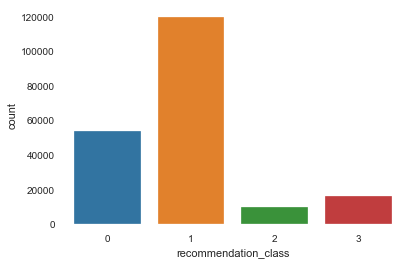

In [63]:
sns.countplot(x='recommendation_class',data=data)

## 0 - cbf
## 1- fallback
## 2 - random
## 3 - Stereotype

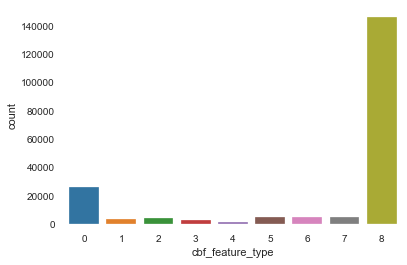

In [64]:
sns.countplot(x='cbf_feature_type',data=data)

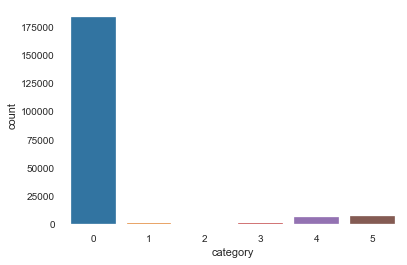

In [65]:
sns.countplot(x='category',data=data)

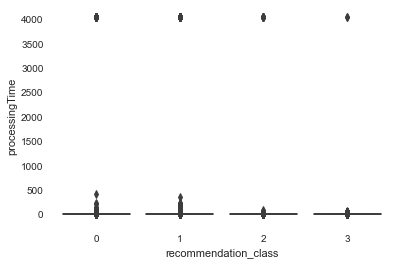

In [66]:
sns.boxplot(x = 'recommendation_class',y='processingTime',data=data)

# checking correlation

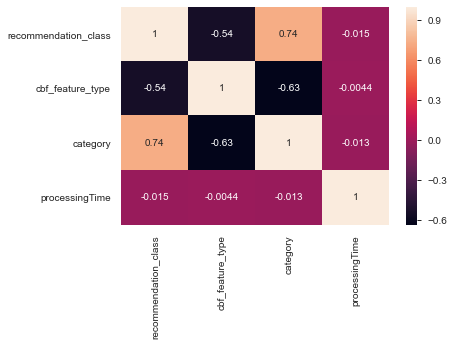

In [67]:
corr_mat = data.corr()
sns.heatmap(corr_mat,annot=True)

In [68]:
# here we observe average correlation so we significantly can't delete more columns. 
#all are above columns are contributing for preparing a model

In [69]:
data['category'].clip(upper = 200,inplace = True)

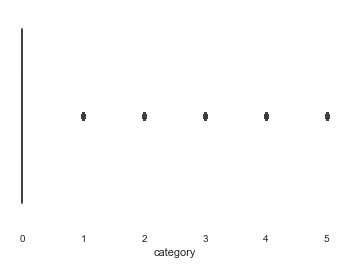

In [70]:
#checking for outliers
sns.boxplot(data['category'])

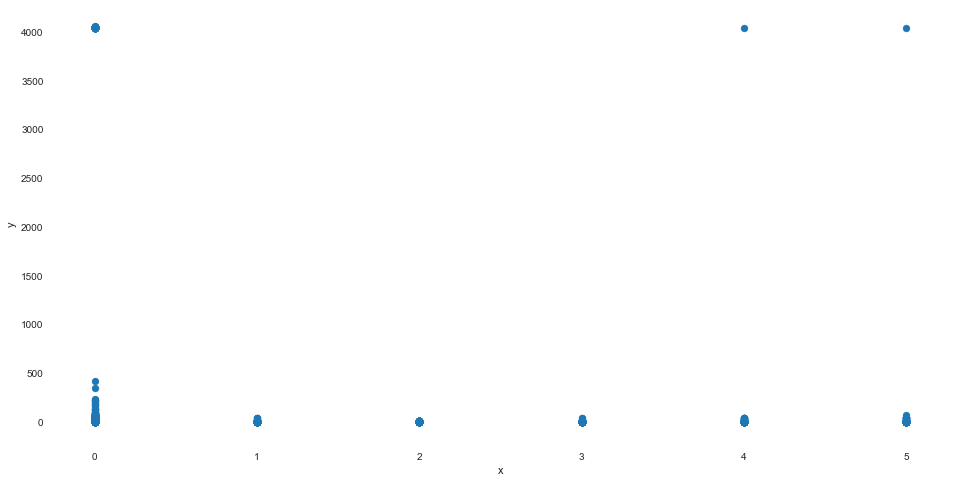

In [74]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['category'], data['processingTime'])
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [72]:
#we can also check using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

recommendation_class    1.0
cbf_feature_type        1.0
category                0.0
processingTime          2.0
dtype: float64


In [75]:
#we notice few points far away but they are not outliers. its in the range 

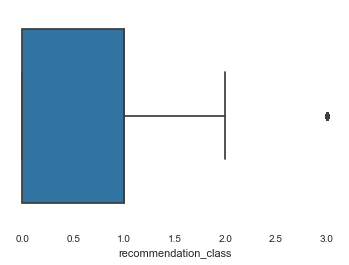

In [78]:
sns.boxplot(x=data['recommendation_class'])

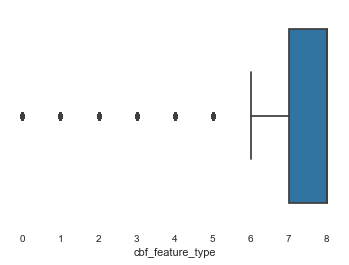

In [79]:
sns.boxplot(x=data['cbf_feature_type'])

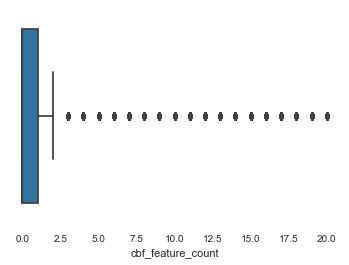

In [83]:
#these dots are categories of the features
sns.boxplot(x=data['cbf_feature_count'])

# One hot encoding

In [100]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder() 
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0-5])], 
                                      remainder='passthrough')  
data = np.array(columnTransformer.fit_transform(data), dtype = np.str) 


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [101]:
data.shape

(200000, 18)